## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, plot_confusion_matrix, f1_score

## Loading the data

In [2]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

#### as we can see this data this data is about 303 rows and 14 column

## Exploring our dataset 

In [4]:
df.sex.value_counts(normalize=True)

1    0.683168
0    0.316832
Name: sex, dtype: float64

#### this mean we have more female then male.

#### let's plot only people who got disease by sex

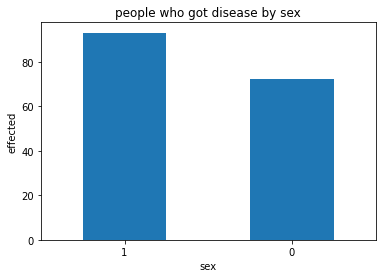

In [5]:
df.sex[df.target==1].value_counts().plot(kind="bar")
# commenting the plot 
plt.title("people who got disease by sex")
plt.xlabel("sex")
plt.ylabel("effected"); 
plt.xticks(rotation = 0);

In [6]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

#### the two classes are almost equal

### Ploting Heart Disease by Age / Max Heart Rate

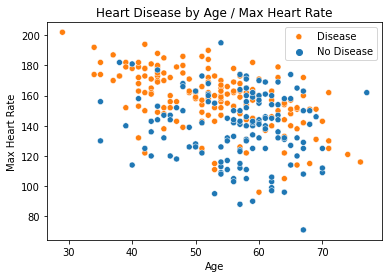

In [7]:
sns.scatterplot(x=df.age, y=df.thalach, hue = df.target);
# commenting the plot 
plt.title("Heart Disease by Age / Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

### Correlation matrix  

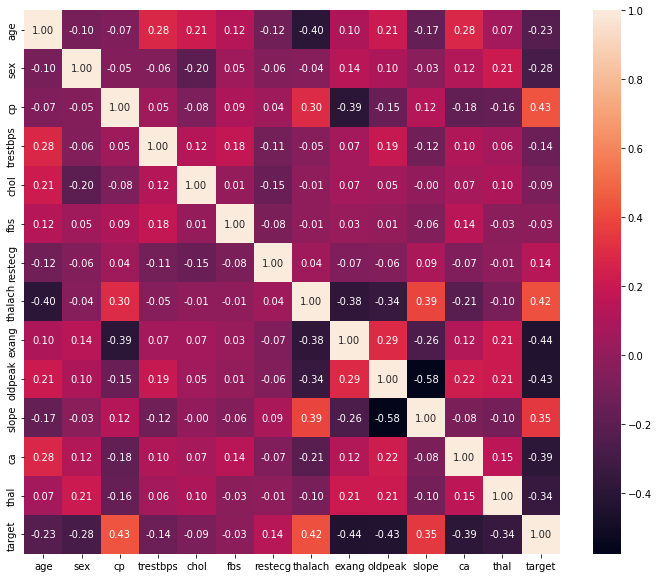

In [8]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', ax=ax);

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Modeling

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Features / Lable

In [11]:
X = df.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [12]:
y = df.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

#### Spliting our dataset with 20% for test

In [13]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

## Evaluation metrics

#### Function for geting score (f1 and acc) and ploting the confusion metrix

In [15]:
def getScore(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('f1_score')
    print(f1_score(y_test,y_pred,average='binary'))
    print('accuracy')
    acc = accuracy_score(y_test,y_pred, normalize=True)
    print(acc)
    print('Confusion Matrix :')
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()
    return acc

f1_score
0.875
accuracy
0.8688524590163934
Confusion Matrix :


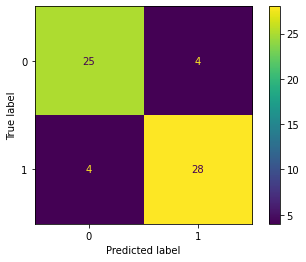

In [16]:
np.random.seed(42)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train);
clf_accuracy = getScore(clf, X_test, y_test)

#### Classification report

In [17]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### ROC curve

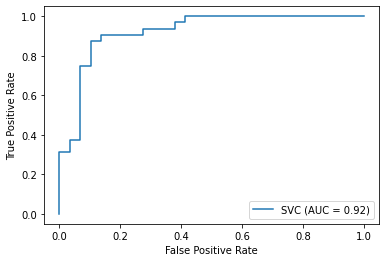

In [18]:
plot_roc_curve(clf, X_test, y_test);

## Feature importance

In [19]:
clf.coef_

array([[ 0.00609556, -0.99254634,  0.61699588, -0.0170269 , -0.00190245,
         0.43019654,  0.18124373,  0.01232462, -0.59604274, -0.50634219,
         0.4924634 , -0.59762528, -0.88652235]])

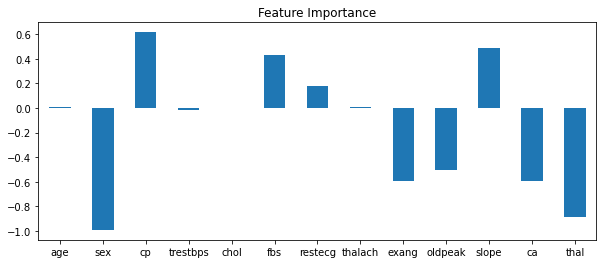

In [20]:
f_dict = dict(zip(X.columns , clf.coef_[0]))
f_data = pd.DataFrame(f_dict, index=[0])
f_data.T.plot.bar(title="Feature Importance", legend=False, figsize=(10,4));
plt.xticks(rotation = 0);

#### from this plot we can see features who have importance or not

#### for example features like age, trestbps, chol and thalach has the lees importance, 
#### but features like sex, cp, exang, ...etc, have more importance

## Cross-validation

In [21]:
cv_precision = np.mean(cross_val_score(SVC(kernel='linear'),
                                       X,
                                       y,
                                       cv=5)) 
cv_precision

0.8283060109289618

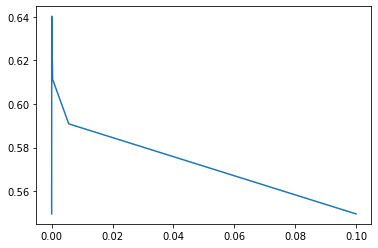

In [22]:
param_range = np.logspace(-6, -1, 5)
train_score, val_score = validation_curve(SVC(), X_train, y_train, param_name='gamma', param_range=param_range, cv=5)
plt.plot(param_range, val_score.mean(axis=1));

## GreadSearcheCV

In [23]:
np.random.seed(42)
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'sigmoid']}

grid_search = GridSearchCV(estimator = SVC(), param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_params_
print('best grid = ', best_grid)
grid_accuracy = grid_search.score(X_test, y_test)
print('Grid Score = ', grid_accuracy)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C

[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:  1.4min



[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.9s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.9s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.6s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   1.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] 

[Parallel(n_jobs=-1)]: Done 633 tasks      | elapsed:  5.7min



[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .................... C=100, gamma=1, kernel=linear, total=  18.8s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .................... C=100, gamma=1, kernel=linear, total=  13.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .................... C=100, gamma=1, kernel=linear, total=   5.1s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] 

[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  9.6min finished


best grid =  {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Grid Score =  0.8688524590163934


In [24]:
best_grid


{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [25]:
grid_accuracy

0.8688524590163934

## Comparing results

In [26]:
import plotly.express as px
data = pd.DataFrame([["SVM", clf_accuracy], ["SVM_grid", grid_accuracy]], columns = ['Models','Score'])
fig = px.bar(data_frame = data,
             x="Models",
             y="Score",
             color="Models", title = "<b>Models Score</b>", template = 'plotly_dark')

fig.update_layout(bargap=0.5)

fig.show()